<a href="https://colab.research.google.com/github/ReAlex1902/ML/blob/master/sem3/seminar_3_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
# /content/gdrive/Shared drives/DigitalHome I UnlimitedDisc 3/Alex/datasets/ML/SBER_101001_171001.txt

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

mvid = pd.read_csv('/content/gdrive/Shared drives/DigitalHome I UnlimitedDisc 3/Alex/datasets/ML/SBER_101001_171001.txt')
sber = pd.read_csv('/content/gdrive/Shared drives/DigitalHome I UnlimitedDisc 3/Alex/datasets/ML/SBER_101001_171001.txt')

sber.head()

,<TICKER>,<PER>,<DATE>,<TIME>,<CLOSE>,<VOL>
0,SBER,D,20101001,0,89.09,332429890
1,SBER,D,20101004,0,89.88,194032721
2,SBER,D,20101005,0,91.97,198775753
3,SBER,D,20101006,0,91.20,210406027
4,SBER,D,20101007,0,90.40,145137617


In [3]:
res = pd.merge(sber, mvid, on = '<DATE>')
res.head()

,<TICKER>_x,<PER>_x,<DATE>,<TIME>_x,<CLOSE>_x,<VOL>_x,<TICKER>_y,<PER>_y,<TIME>_y,<CLOSE>_y,<VOL>_y
0,SBER,D,20101001,0,89.09,332429890,SBER,D,0,89.09,332429890
1,SBER,D,20101004,0,89.88,194032721,SBER,D,0,89.88,194032721
2,SBER,D,20101005,0,91.97,198775753,SBER,D,0,91.97,198775753
3,SBER,D,20101006,0,91.20,210406027,SBER,D,0,91.20,210406027
4,SBER,D,20101007,0,90.40,145137617,SBER,D,0,90.40,145137617


In [4]:
x = res['<CLOSE>_x']
y = res['<CLOSE>_y']

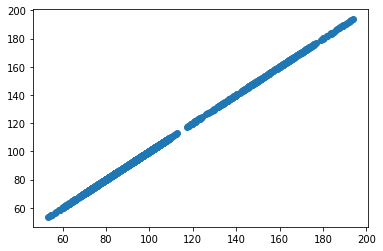

In [5]:
plt.figure()
plt.scatter(x, y)
plt.show()

In [6]:
class hypothesis(object):
    '''Модель парной линейной регрессии&quot'''
    def __init__(self):
        self.b0 = 0
        self.b1 = 0

    def predict(self, x):
        return self.b0 + self.b1 * x

    def error(self, X, Y):
        return sum((self.predict(X) - Y)**2) / (2 * len(X))

    def BGD(self, X, Y, alpha = 0.00005):
        dJ0 = sum(self.predict(X) - Y) /len(X)
        dJ1 = sum((self.predict(X) - Y) * X) /len(X)
        self.b0 -= alpha * dJ0
        self.b1 -= alpha * dJ1

In [7]:
hyp = hypothesis()
print(hyp.predict(0))
print(hyp.predict(100))
J = hyp.error(x, y)
print("initial error: ", J)

0
0
initial error:  5769.919997525599


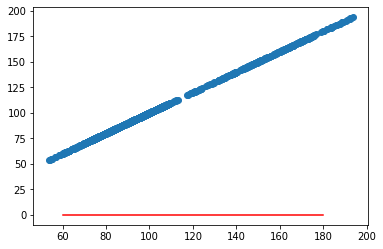

In [8]:
X0 = np.linspace(60, 180, 100)
Y0 = hyp.predict(X0)
plt.figure()
plt.scatter(x, y)
plt.plot(X0, Y0, 'r')
plt.show()

In [9]:
hyp.BGD(x, y)
J = hyp.error(x, y)
print('error after gradient descent: ', J)

error after gradient descent:  1032.2201388241642


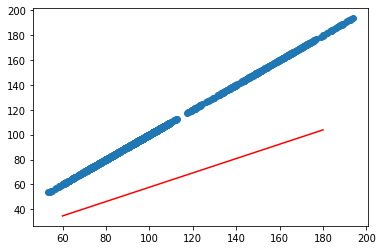

In [10]:
X0 = np.linspace(60, 180, 100)
Y0 = hyp.predict(X0)
plt.figure()
plt.scatter(x, y)
plt.plot(X0, Y0, 'r')
plt.show()

In [11]:
class hypothesis(object):
    '''Модель парной линейной регрессии&quot'''
    def __init__(self):
        self.b0 = 0
        self.b1 = 0

    def predict(self, x):
        return self.b0 + self.b1 * x

    def error(self, X, Y):
        return sum((self.predict(X) - Y)**2) / (2 * len(X))

    def BGD(self, X, Y, alpha=0.000005, accuracy=0.01):
        steps, errors = [], []
        step = 0
        old_err = hyp.error(X, Y)
        new_err = hyp.error(X, Y) - 1
        dJ = 1
        
        while dJ > accuracy:
            dJ0 = sum(self.predict(X) - Y) /len(X)
            dJ1 = sum((self.predict(X) - Y) * X) /len(X)
            self.b0 -= alpha * dJ0
            self.b1 -= alpha * dJ1
            old_err = new_err
            new_err = hyp.error(X, Y)
            dJ = old_err - new_err
            step += 1
            steps.append(step)
            errors.append(new_err)

        return steps, errors

In [12]:
hyp = hypothesis()
steps, errors = hyp.BGD(x, y)
J = hyp.error(x, y)
print('error after gradient descent: ', J)

error after gradient descent:  0.07191202690737512


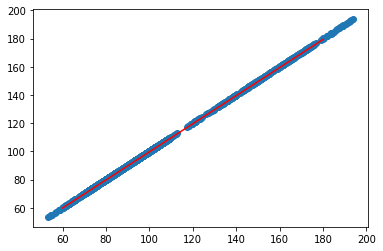

In [13]:
X0 = np.linspace(60, 180, 100)
Y0 = hyp.predict(X0)
plt.figure()
plt.scatter(x, y)
plt.plot(X0, Y0, 'r')
plt.show()

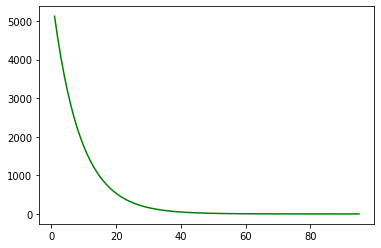

In [14]:
plt.figure()
plt.plot(steps, errors, 'g')
plt.show()

# Контрольные вопросы
1) Предсказать стоимость дома имея его параметры \
2) МНК - метод оптимизации алгоритма машинного обучения, в основу которого входит минимизация квадрата разности таргета и предсказанного значения (отсюда и название)\
3) Среднеквадратичная ошибка, средняя абсолютная ошибка, средняя абсолютная процентная ошибка \
4) Конкретное значение среднеквадратической ошибки уакзывает на среднеквадратичное отклонение предсказанного значения \
5) Для того, чтобы отслеживать процесс обучения и избежать ситуаций переобучения и недообучения

# Дополнительные задания

In [17]:
class hypothesis(object):
    '''Модель парной линейной регрессии&quot'''
    def __init__(self):
        self.b0 = 0
        self.b1 = 0

    def predict(self, x):
        return self.b0 + self.b1 * x

    def error(self, X, Y):
        return sum((self.predict(X) - Y)**2) / (2 * len(X))

    def Adam(self, X, Y, alpha=0.000005, accuracy = 1e-6, batch_size = 64, beta_1 = 0.9, beta_2 = 0.999):
        '''
        Задание 1: используется адаптивный метод обучения Adam
        '''
        steps, errors = [], []
        step = 0
        old_err = hyp.error(X, Y)
        new_err = hyp.error(X, Y) - 1
        dJ = 1

        velocity_0 = 0
        velocity_1 = 0
        accumulated = 0

        indices = len(X)                
        indices = np.arange(indices)    ## генерируем индексы для дальнейшего вычисления грудиента по батчу. Задание 3
        
        while dJ > accuracy:
            batch = np.random.choice(indices, batch_size)       ## берем определенный батч по вычисленным индексам
            
            dJ0 = sum(self.predict(X[batch]) - Y[batch]) /len(X[batch])
            dJ1 = sum((self.predict(X[batch]) - Y[batch]) * X[batch]) /len(X[batch])

            velocity_0 = beta_1 * velocity_0 - (1 - beta_1) * dJ0              
            velocity_1 = beta_1 * velocity_1 - (1 - beta_1) * dJ1
            accumulated = beta_2 * accumulated + (1 + beta_2) * dJ ** 2
            adaptive_lr = alpha / np.sqrt(accumulated)

            self.b0 -= adaptive_lr * dJ0 
            self.b1 -= adaptive_lr * dJ1
            old_err = new_err
            new_err = hyp.error(X, Y)
            dJ = old_err - new_err
            step += 1
            steps.append(step)
            errors.append(new_err)

            if step % 1000 == 0:
                print(f'Epoch: {step // 1000}, Error: {new_err}')

        return steps, errors

In [18]:
hyp = hypothesis()
steps, errors = hyp.Adam(x, y)
J = hyp.error(x, y)
print('error after gradient descent: ', J)

Epoch: 1, Error: 4113.759258044469
Epoch: 2, Error: 2667.5203327869635
Epoch: 3, Error: 1349.7002026188295
Epoch: 4, Error: 474.29089746766374
Epoch: 5, Error: 90.46305944146006
Epoch: 6, Error: 6.084092078429435
Epoch: 7, Error: 0.07093803157838112
error after gradient descent:  0.00012621689155206144


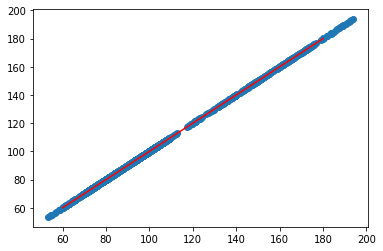

In [19]:
X0 = np.linspace(60, 180, 100)
Y0 = hyp.predict(X0)
plt.figure()
plt.scatter(x, y)
plt.plot(X0, Y0, 'r')
plt.show()

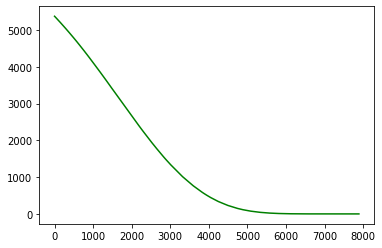

In [20]:
plt.figure()
plt.plot(steps, errors, 'g')
plt.show()

# Задание 2

In [21]:
mvid = pd.read_csv('/content/gdrive/Shared drives/DigitalHome I UnlimitedDisc 3/Alex/datasets/ML/YNDX_101001_171001.txt')
yndx = pd.read_csv('/content/gdrive/Shared drives/DigitalHome I UnlimitedDisc 3/Alex/datasets/ML/YNDX_101001_171001.txt')

res = pd.merge(yndx, mvid, on = '<DATE>')
res.head()

,<TICKER>_x,<PER>_x,<DATE>,<TIME>_x,<CLOSE>_x,<VOL>_x,<TICKER>_y,<PER>_y,<TIME>_y,<CLOSE>_y,<VOL>_y
0,YNDX,D,20140604,0,1170.0,35146,YNDX,D,0,1170.0,35146
1,YNDX,D,20140605,0,1145.1,24973,YNDX,D,0,1145.1,24973
2,YNDX,D,20140606,0,1163.0,7889,YNDX,D,0,1163.0,7889
3,YNDX,D,20140609,0,1172.1,7304,YNDX,D,0,1172.1,7304
4,YNDX,D,20140610,0,1170.0,3207,YNDX,D,0,1170.0,3207


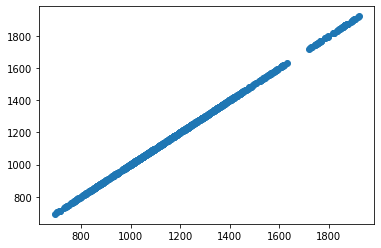

In [22]:
x = res['<CLOSE>_x']
y = res['<CLOSE>_y']

plt.figure()
plt.scatter(x, y)
plt.show()

In [23]:
hyp = hypothesis()
steps, errors = hyp.Adam(x, y, alpha = 2e-7)
J = hyp.error(x, y)
print('error after gradient descent: ', J)

Epoch: 1, Error: 438669.40567426325
Epoch: 2, Error: 437401.141620057
Epoch: 3, Error: 435320.1375019705
Epoch: 4, Error: 431902.9099037549
Epoch: 5, Error: 426322.69086720294
Epoch: 6, Error: 417284.05052675464
Epoch: 7, Error: 402789.684982887
Epoch: 8, Error: 380060.3436878799
Epoch: 9, Error: 345868.75268352596
Epoch: 10, Error: 299537.27283106087
Epoch: 11, Error: 247061.92410068528
Epoch: 12, Error: 196535.97512638956
Epoch: 13, Error: 151691.26593738972
Epoch: 14, Error: 112784.11158833325
Epoch: 15, Error: 80052.98027343924
Epoch: 16, Error: 53374.43159529718
Epoch: 17, Error: 32583.970469830354
Epoch: 18, Error: 17432.18207317534
Epoch: 19, Error: 7561.082234223128
Epoch: 20, Error: 2298.3681741142345
Epoch: 21, Error: 363.2703859283998
Epoch: 22, Error: 18.223644742359337
Epoch: 23, Error: 0.1301053315339895
error after gradient descent:  0.00010121538433116284


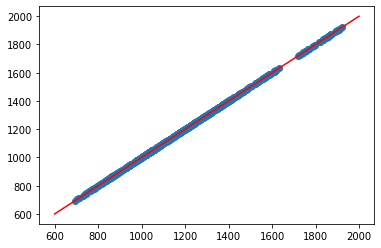

In [24]:
X0 = np.linspace(600, 2000, 100)
Y0 = hyp.predict(X0)
plt.figure()
plt.scatter(x, y)
plt.plot(X0, Y0, 'r')
plt.show()

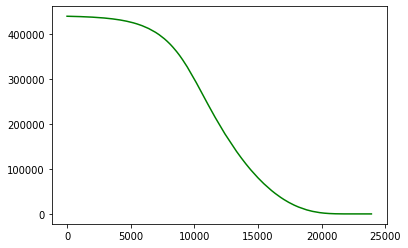

In [25]:
plt.figure()
plt.plot(steps, errors, 'g')
plt.show()

# Задание 4

In [26]:
from sklearn.linear_model import LinearRegression

model = LinearRegression(normalize = False, n_jobs = -1)
model.fit(np.array(x).reshape(-1, 1), y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=-1, normalize=False)

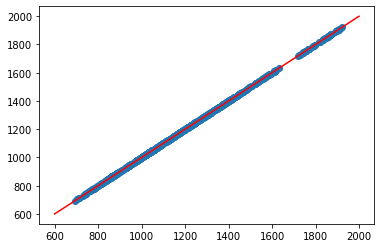

In [27]:
X0 = np.linspace(600, 2000, 100)
Y0 = model.predict(np.array(X0).reshape(-1, 1))
plt.figure()
plt.scatter(x, y)
plt.plot(X0, Y0, 'r')
plt.show()

# Вывод
Получаем, что наш линейный алгоритм приводит к таким же результатам, что и алгоритм sklearn, однако алгоритм библиотеки работает намного быстрее. Таким образом с точки зрения качества прогнощирования оба алгоритма имеют право на существование, но с точки зрения эффективности по времени алгоритм sklearn лучше